#Importing dependcies

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# Load Dataset using Pandas

In [ ]:
loan_dataset=pd.read_csv("/content/sample_data/loan_predicition_train.csv")

In [ ]:
loan_dataset_test=pd.read_csv("/content/sample_data/loan_predicition_test.csv")

In [ ]:
test_orignal=loan_dataset_test.copy()

In [ ]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Checking Missing Value

In [ ]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Handling Missing Value


In [ ]:

loan_dataset['Gender'].value_counts()




Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
loan_dataset['Gender'].fillna('Male',inplace=True)
loan_dataset_test['Gender'].fillna('Male',inplace=True)
loan_dataset['Gender'].value_counts()



Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:

loan_dataset['Married'].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
loan_dataset['Married'].fillna('Yes',inplace=True)
loan_dataset_test['Married'].fillna('Yes',inplace=True)
loan_dataset['Married'].value_counts()


Yes    401
No     213
Name: Married, dtype: int64

In [ ]:

loan_dataset['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
loan_dataset['Dependents'].fillna('0',inplace=True)
loan_dataset_test['Dependents'].fillna('0',inplace=True)
loan_dataset['Dependents'].value_counts()


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:

loan_dataset['Self_Employed'].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
loan_dataset['Self_Employed'].fillna('No',inplace=True)
loan_dataset_test['Self_Employed'].fillna('No',inplace=True)
loan_dataset['Self_Employed'].value_counts()


No     532
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:

loan_dataset['Loan_Amount_Term'].value_counts().head(3)


360.0    512
180.0     44
480.0     15
Name: Loan_Amount_Term, dtype: int64

In [ ]:
loan_dataset['Loan_Amount_Term'].fillna(360.0,inplace=True)
loan_dataset_test['Loan_Amount_Term'].fillna(360.0,inplace=True)
loan_dataset['Loan_Amount_Term'].value_counts()


360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:

loan_dataset['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
loan_dataset['Credit_History'].fillna(1.0,inplace=True)
loan_dataset_test['Credit_History'].fillna(1.0,inplace=True)
loan_dataset['Credit_History'].value_counts()


1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [ ]:

loan_dataset['LoanAmount'].value_counts()


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].median(),inplace=True)
loan_dataset_test['LoanAmount'].fillna(loan_dataset['LoanAmount'].median(),inplace=True)



In [ ]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#EDA

In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.describe(include=[np.number])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
loan_dataset.describe(include=[object])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


Distribution of Target Variable ( balanced or unbalanced class)

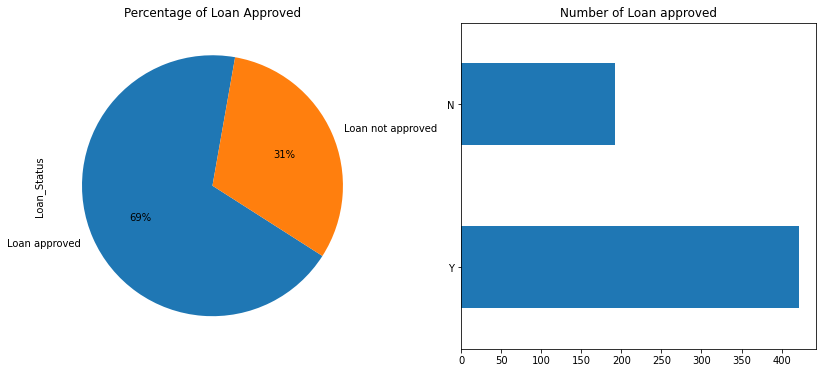

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))
ax1=loan_dataset['Loan_Status'].value_counts().plot.pie(autopct='%0.0f%%',labels=["Loan approved","Loan not approved"],startangle=80,ax=ax1)
ax1.set_title('Percentage of Loan Approved')
ax2=loan_dataset['Loan_Status'].value_counts().plot(kind="barh",ax=ax2)
ax2.set_title('Number of Loan approved')
plt.show()

Distribution of Categorical and Ordinal Feature


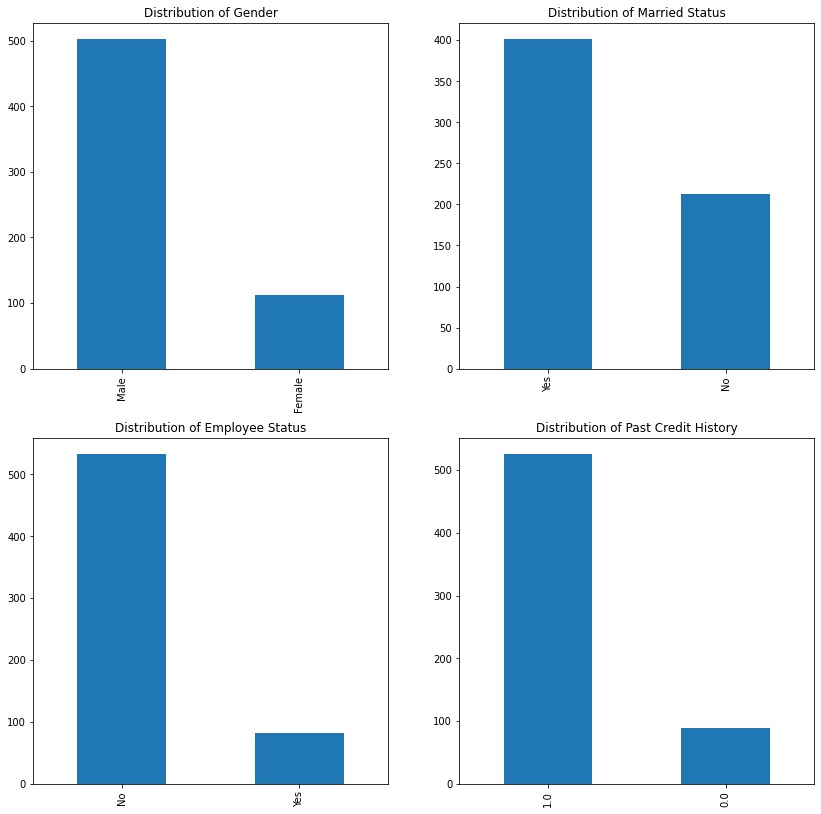

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharey=False, figsize=(14,14))
ax1=loan_dataset['Gender'].value_counts().plot.bar(ax=ax1)
ax1.set_title('Distribution of Gender')
ax2=loan_dataset['Married'].value_counts().plot.bar(ax=ax2)
ax2.set_title('Distribution of Married Status')

ax3=loan_dataset['Self_Employed'].value_counts().plot.bar(ax=ax3)
ax3.set_title('Distribution of Employee Status')
ax4=loan_dataset['Credit_History'].value_counts().plot.bar(ax=ax4)
ax4.set_title('Distribution of Past Credit History')
plt.show()

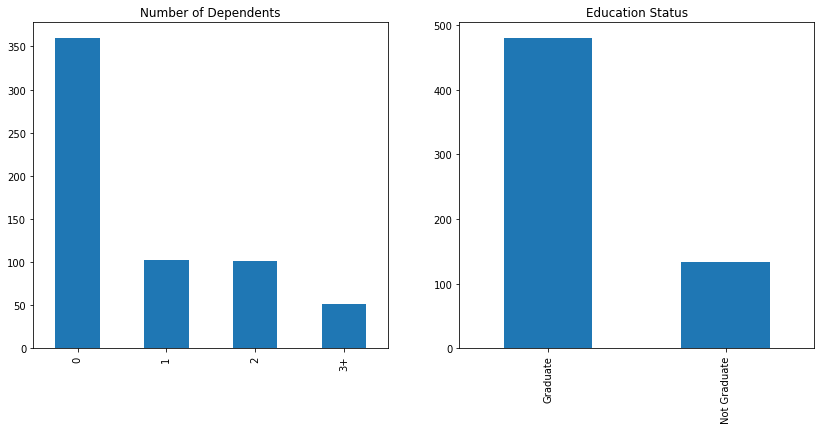

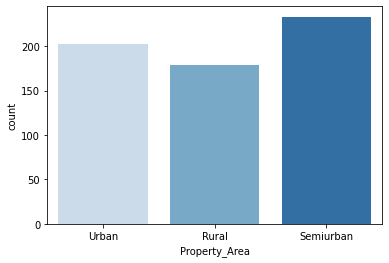

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=False, figsize=(14,6))
ax1=loan_dataset['Dependents'].value_counts().plot.bar(ax=ax1)
ax1.set_title('Number of Dependents')
ax2=loan_dataset['Education'].value_counts().plot.bar(ax=ax2)
ax2.set_title('Education Status')
plt.show()

ax3=sns.countplot(data=loan_dataset,x="Property_Area",palette ='Blues')



Distribution of Numerical Feature

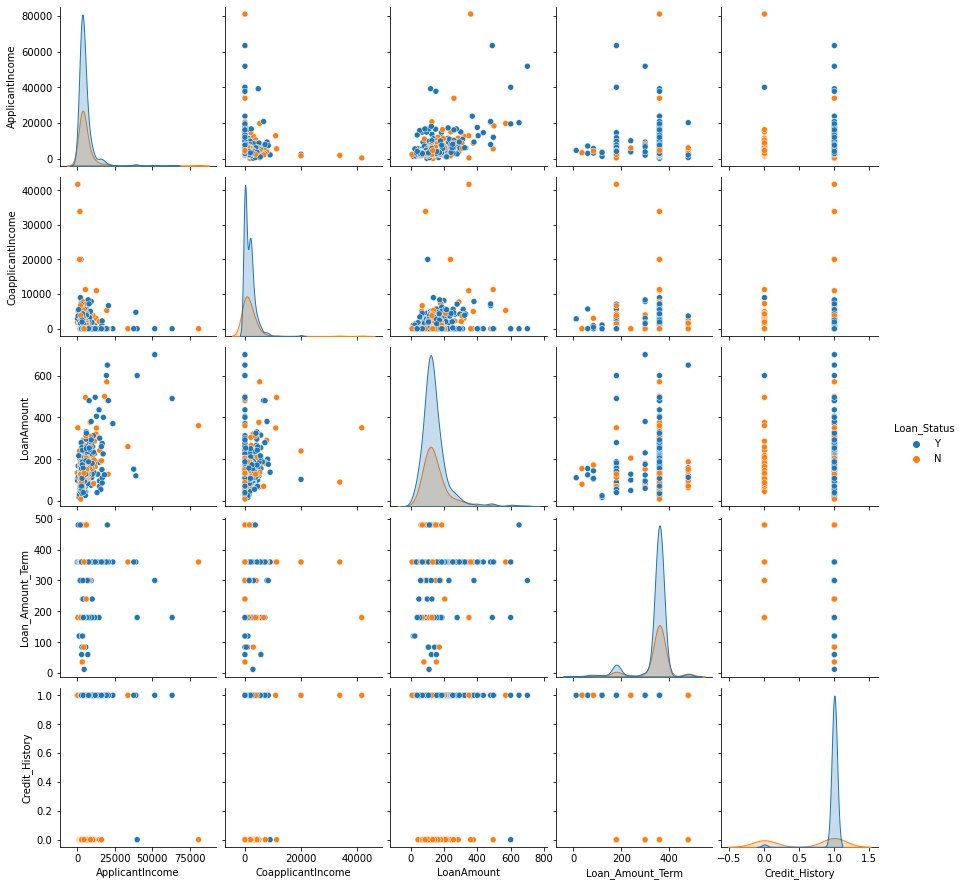

In [ ]:
sns.pairplot(loan_dataset,hue='Loan_Status',vars=["ApplicantIncome", "CoapplicantIncome", "LoanAmount","Loan_Amount_Term","Credit_History"])

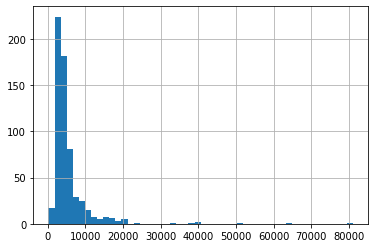

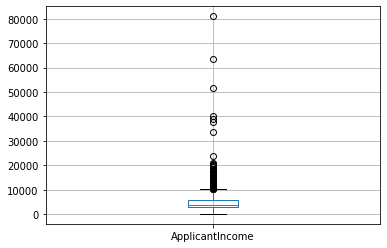

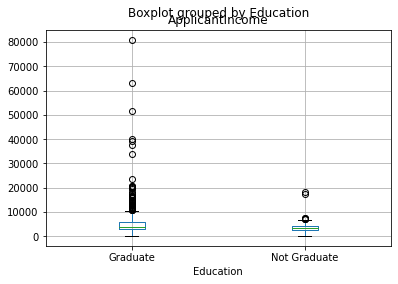

In [ ]:

loan_dataset['ApplicantIncome'].hist(bins=50)
plt.show()

loan_dataset.boxplot(column='ApplicantIncome')
plt.show()

loan_dataset.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

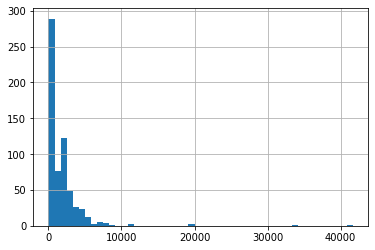

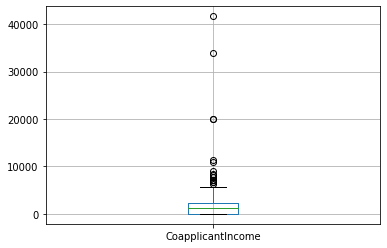

In [ ]:

loan_dataset['CoapplicantIncome'].hist(bins=50)
plt.show()
loan_dataset.boxplot(column='CoapplicantIncome')
plt.show()



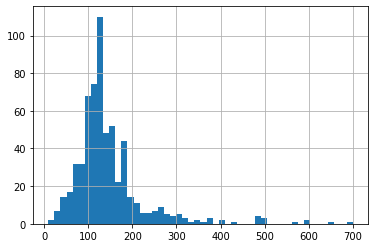

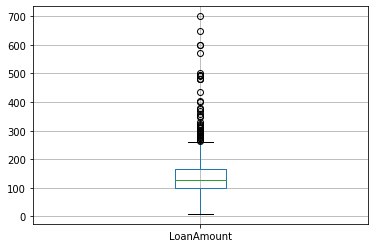

In [ ]:

loan_dataset['LoanAmount'].hist(bins=50)
plt.show()
loan_dataset.boxplot(column='LoanAmount')
plt.show()


#Outlier Removal


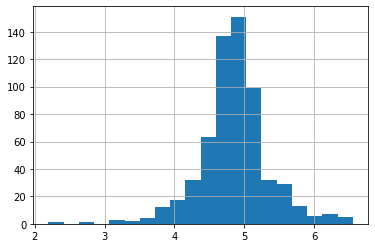

In [ ]:
loan_dataset['LoanAmount_new_log'] = np.log(loan_dataset['LoanAmount'])
loan_dataset_test['LoanAmount_new_log'] = np.log(loan_dataset_test['LoanAmount'])
loan_dataset['LoanAmount_new_log'].hist(bins=20)

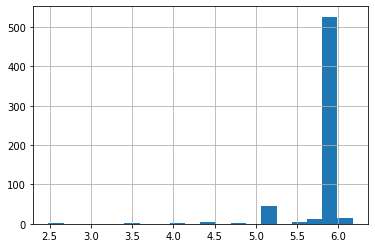

In [ ]:
loan_dataset['Loan_Amount_Term_new_log'] = np.log(loan_dataset['Loan_Amount_Term'])
loan_dataset_test['Loan_Amount_Term_new_log'] = np.log(loan_dataset_test['Loan_Amount_Term'])
loan_dataset['Loan_Amount_Term_new_log'].hist(bins=20)

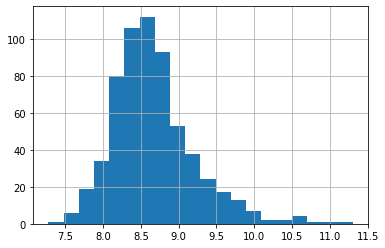

In [ ]:
loan_dataset['TotalIncome'] = loan_dataset['ApplicantIncome'] + loan_dataset['CoapplicantIncome']
loan_dataset_test['TotalIncome'] = loan_dataset_test['ApplicantIncome'] + loan_dataset_test['CoapplicantIncome']
loan_dataset['TotalIncome_new_log'] = np.log(loan_dataset['TotalIncome'])
loan_dataset_test['TotalIncome_new_log'] = np.log(loan_dataset_test['TotalIncome'])
loan_dataset['TotalIncome_new_log'].hist(bins=20) 

#Encoding Categorical Values

In [ ]:
loan_dataset["Dependents"] = loan_dataset["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})
loan_dataset_test["Dependents"] = loan_dataset_test["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

In [ ]:
loan_dataset = pd.get_dummies(loan_dataset, columns = ['Married', 'Gender','Education','Self_Employed','Property_Area','Dependents'],drop_first=True)
loan_dataset_test=pd.get_dummies(loan_dataset_test, columns = ['Married', 'Gender','Education','Self_Employed','Property_Area','Dependents'],drop_first=True)

In [ ]:
loan_dataset.drop(columns=['Loan_ID'],inplace=True)
loan_dataset_test.drop(columns=['Loan_ID'],inplace=True)

In [ ]:
loan_dataset["Loan_Status"] = loan_dataset["Loan_Status"].map({"N": 0, "Y": 1})

In [ ]:
loan_dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_new_log,Loan_Amount_Term_new_log,TotalIncome,TotalIncome_new_log,Married_Yes,Gender_Male,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3
0,5849,0.0,128.0,360.0,1.0,1,4.852030,5.886104,5849.0,8.674026,0,1,0,0,0,1,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,5.886104,6091.0,8.714568,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,5.886104,3000.0,8.006368,1,1,0,1,0,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,5.886104,4941.0,8.505323,1,1,1,0,0,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,1,4.948760,5.886104,6000.0,8.699515,0,1,0,0,0,1,0,0,0


In [ ]:
loan_dataset_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_new_log,Loan_Amount_Term_new_log,TotalIncome,TotalIncome_new_log,Married_Yes,Gender_Male,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3
0,5720,0,110.0,360.0,1.0,4.700480,5.886104,5720,8.651724,1,1,0,0,0,1,0,0,0
1,3076,1500,126.0,360.0,1.0,4.836282,5.886104,4576,8.428581,1,1,0,0,0,1,1,0,0
2,5000,1800,208.0,360.0,1.0,5.337538,5.886104,6800,8.824678,1,1,0,0,0,1,0,1,0
3,2340,2546,100.0,360.0,1.0,4.605170,5.886104,4886,8.494129,1,1,0,0,0,1,0,1,0
4,3276,0,78.0,360.0,1.0,4.356709,5.886104,3276,8.094378,0,1,1,0,0,1,0,0,0


In [ ]:
#features and target variables
x=loan_dataset.drop(['Loan_Status','LoanAmount','TotalIncome','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'], axis=1)
loan_dataset_test=loan_dataset_test.drop(['LoanAmount','TotalIncome','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'], axis=1)
y=loan_dataset['Loan_Status']



#Checking Co-relation

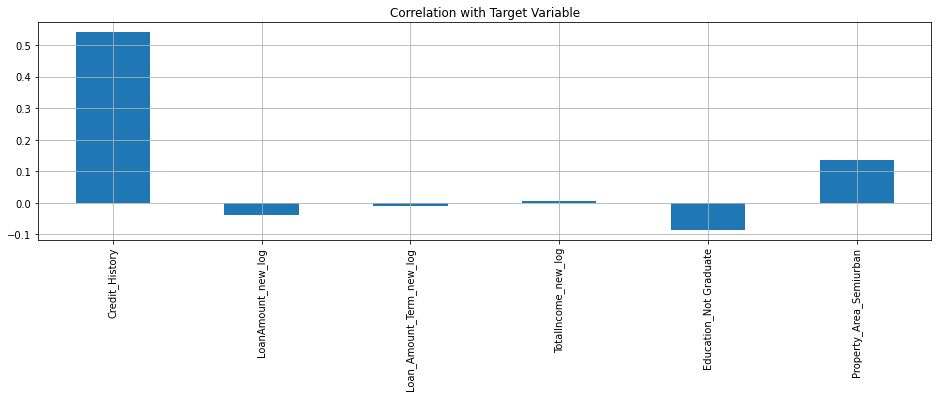

In [ ]:
x.corrwith(y).plot.bar(figsize=(16,4),grid=True,title='Correlation with Target Variable',rot=90)
plt.show()

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test=train_test_split(x,y,stratify=y, test_size=.2,random_state=5)

#Normalisation of Feature

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb



def GetBasedModel():
    basedModels = []
   
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l1',C=0.01,solver='liblinear')))
    basedModels.append(('AB'   , AdaBoostClassifier(n_estimators=50, learning_rate =1)))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=1000,max_features='sqrt',learning_rate=0.01,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,random_state=10)))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=50,max_features='auto',bootstrap=True)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma=0.0001,C=1000,)))

    
    return basedModels


   
def BasedLine2(X_train, y_train,models):
   
    scoring = 'accuracy'
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, Y_train,models)

In [ ]:
loan_dataset_test.head()

,Credit_History,LoanAmount_new_log,Loan_Amount_Term_new_log,TotalIncome_new_log,Education_Not Graduate,Property_Area_Semiurban
0,1.0,4.700480,5.886104,8.651724,0,0
1,1.0,4.836282,5.886104,8.428581,0,0
2,1.0,5.337538,5.886104,8.824678,0,0
3,1.0,4.605170,5.886104,8.494129,0,0
4,1.0,4.356709,5.886104,8.094378,1,0


In [ ]:
X_train.head()

,Credit_History,LoanAmount_new_log,Loan_Amount_Term_new_log,TotalIncome_new_log,Education_Not Graduate,Property_Area_Semiurban
128,0.0,5.075174,5.192957,9.572411,0,0
502,1.0,5.337538,5.886104,9.258082,0,1
581,1.0,4.499810,5.886104,10.482149,0,0
316,1.0,4.787492,5.886104,8.220672,0,1
524,1.0,4.852030,5.886104,8.819813,0,1


In [ ]:
model_LR = LogisticRegression(penalty='l2')
model_SVM=SVC(kernel='linear',gamma='auto',probability=True)
model_RFC=RandomForestClassifier(criterion='gini',n_estimators=100)
model_LR.fit(X_train, Y_train)
model_SVM.fit(X_train, Y_train)
model_RFC.fit(X_train, Y_train)
pred_test_LR = model_LR.predict(loan_dataset_test)
pred_test_SVM = model_SVM.predict(loan_dataset_test)
pred_test_RFC = model_RFC.predict(loan_dataset_test)

#Feature Importance

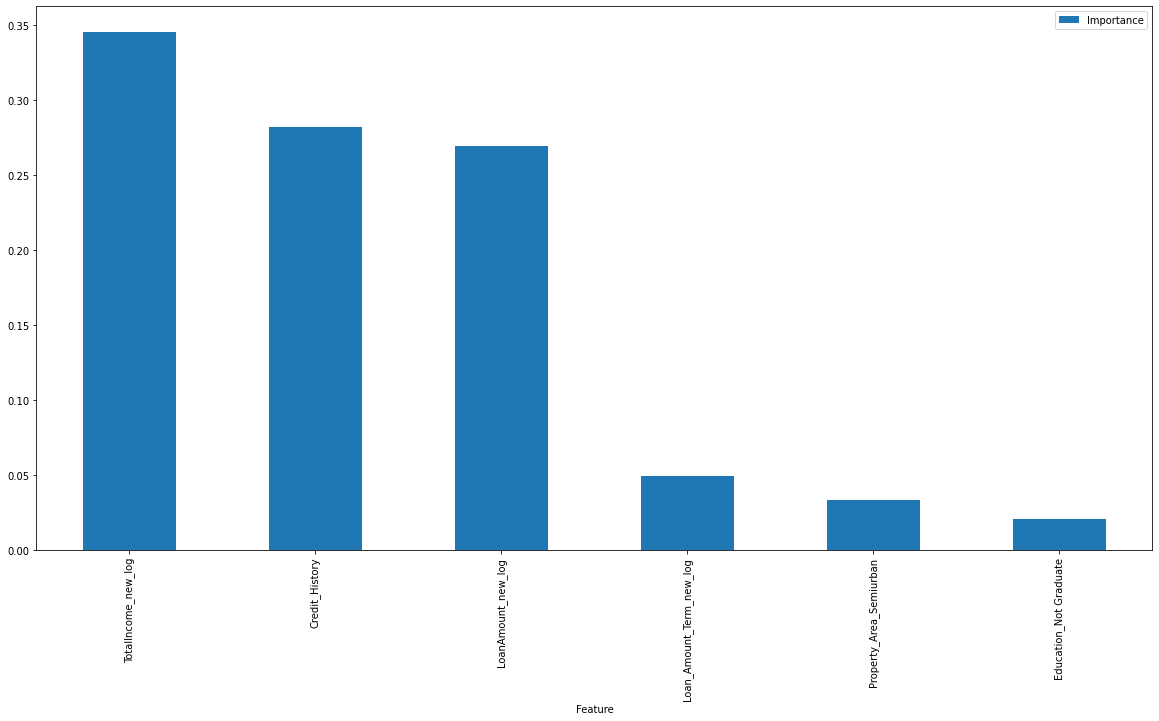

In [ ]:
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Importance'] = model_RFC.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)
features.plot(kind='bar', figsize=(20, 10))

In [ ]:
submission_LR=pd.read_csv("/content/sample_data/Sample_Submission_file.csv")
submission_SVM=pd.read_csv("/content/sample_data/Sample_SVM_Submission.csv")
submission_RFC=pd.read_csv("/content/sample_data/Sample_RFC_Submission.csv")
submission_LR['Loan_Status']=pred_test_LR
submission_SVM['Loan_Status']=pred_test_SVM
submission_RFC['Loan_Status']=pred_test_RFC

In [ ]:
submission_LR['Loan_ID']=test_orignal['Loan_ID']
submission_SVM['Loan_ID']=test_orignal['Loan_ID']
submission_RFC['Loan_ID']=test_orignal['Loan_ID']


In [ ]:
submission_LR["Loan_Status"] = submission_LR["Loan_Status"].map({0: 'N', 1: 'Y'})
submission_SVM["Loan_Status"] = submission_SVM["Loan_Status"].map({0: 'N', 1: 'Y'})
submission_RFC["Loan_Status"] = submission_RFC["Loan_Status"].map({0: 'N', 1: 'Y'})
submission_RFC.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [ ]:
pd.DataFrame(submission_LR,columns=['Loan_ID','Loan_Status']).to_csv("/content/sample_data/logistic.csv")

In [ ]:
pd.DataFrame(submission_SVM,columns=['Loan_ID','Loan_Status']).to_csv("/content/sample_data/SVM.csv")

In [ ]:
pd.DataFrame(submission_RFC,columns=['Loan_ID','Loan_Status']).to_csv("/content/sample_data/RFC.csv")